### In this tutorial, you will perform both regression and classification tasks using [scikit-learn](https://scikit-learn.org/stable/getting_started.html). Before starting, make sure you have set up your conda environment according to the instructions provided.

In [1]:
# Numerical and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Scikit-learn: datasets
from sklearn.datasets import make_moons, make_classification, fetch_openml

# Scikit-learn: models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

# Scikit-learn: model evaluation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score
)

# Set plot font size for better visibility
font = {'size': 16}
matplotlib.rc('font', **font)

## Exercise 1: Predicting Fuel Efficiency with Linear Regression

**Problem Description**

You are given real-world data on automobile fuel efficiency. Each record contains information about a car’s technical specifications and its fuel efficiency measured in miles per gallon (MPG).

In this exercise, you will build a linear regression model to predict a car’s fuel efficiency (MPG) based on its engine displacement (displacement).

#### Your Tasks
1. Load the dataset using fetch_openml:

    ```python
    from sklearn.datasets import fetch_openml
    data = fetch_openml("autoMpg", version=1, as_frame=True)
    df = data.frame
    ```
    
2. Extract:
    - Features (X): use only the displacement column.
    - Target (y): use the target values provided by data.target.

3. Visualize the data:
Create a scatter plot showing displacement (engine size) vs MPG (fuel efficiency).

4. Split the data into train and test sets:
Use 80% of the data for training and 20% for testing.

5. Train a Linear Regression model to predict MPG from displacement.

6. Evaluate your model using:
    - Mean Squared Error (MSE): MSE = (1 / N) * sum ( (y_i - y_hat_i)^2 ) --> Penalizes large errors more.
    - Mean Absolute Error (MAE): MAE = (1 / N) * sum ( |y_i - y_hat_i| ) --> More robust to outliers.
    - R² score --> Proportion of variance explained by the model. Values close to 1 are better.

7. Visualize the model predictions:
    - Plot the test data points.
    - Plot the predicted values from your model.

### Step 1: Load and Inspect the Data

In [2]:
# Load the dataset
data = fetch_openml("autoMpg", version=1, as_frame=True)
df = data.frame

# Print the first few rows
print(df.head())

  cylinders  displacement  horsepower  weight  acceleration model origin  \
0         8         307.0       130.0    3504          12.0    70      1   
1         8         350.0       165.0    3693          11.5    70      1   
2         8         318.0       150.0    3436          11.0    70      1   
3         8         304.0       150.0    3433          12.0    70      1   
4         8         302.0       140.0    3449          10.5    70      1   

   class  
0   18.0  
1   15.0  
2   18.0  
3   16.0  
4   17.0  


### Step 2: Extract Features and Target

In [3]:
# TODO: Select displacement column as feature X
X = df[['displacement']]

# TODO: Use the target provided in the dataset
y = data.target


###  Step 3: Visualize the Data

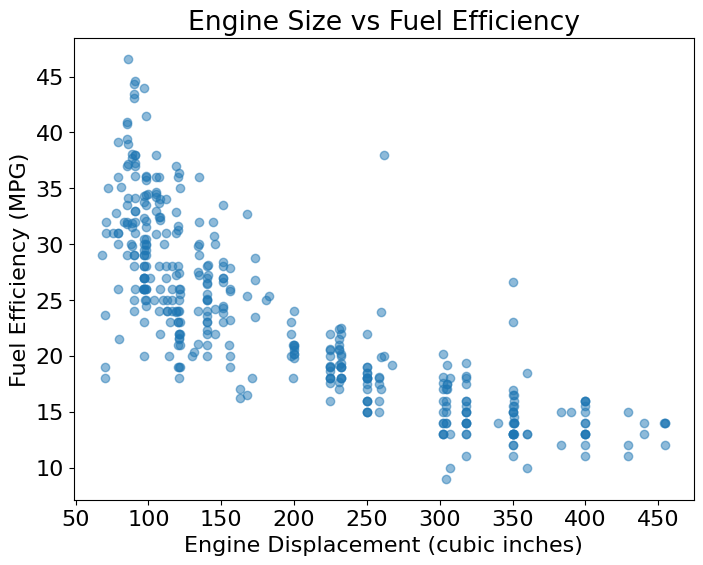

In [4]:
# TODO: Create a scatter plot of displacement vs MPG
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Engine Displacement (cubic inches)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Engine Size vs Fuel Efficiency")
plt.show()

### Step 4: Split into Training and Test Sets

In [5]:
# TODO: Use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train Linear Regression

In [6]:
# TODO: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 6: Evaluate the Model

In [7]:
# TODO: Predict on the test set
y_pred = model.predict(X_test)

# TODO: Compute MSE, MAE, R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 18.10
Mean Absolute Error (MAE): 3.39
R² Score: 0.663


### Step 7: Visualize Predictions

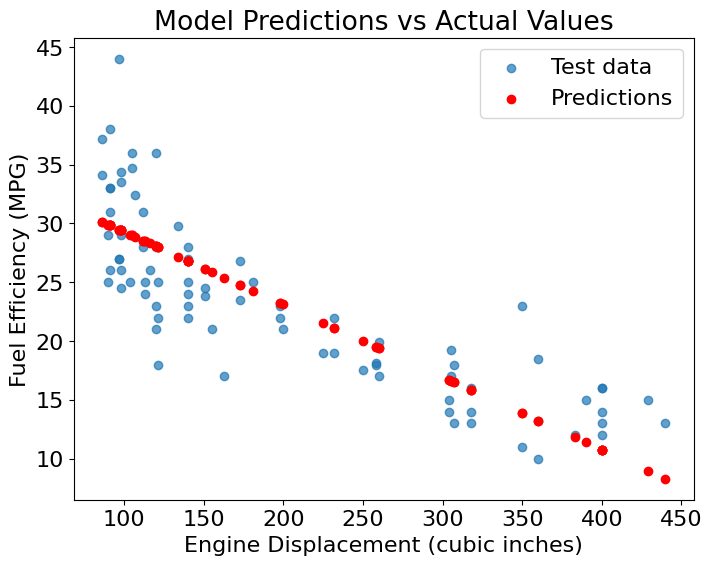

In [8]:
# TODO: Plot test data and predicted values
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label="Test data", alpha=0.7)
plt.scatter(X_test, y_pred, label="Predictions", color='red')
plt.xlabel("Engine Displacement (cubic inches)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.show()

## Exercise 2: Non-linear Classification using Logistic Regression and Neural Network

**Problem Description:**  
You are given a non-linear binary classification problem where two classes are shaped like interleaving moons (non-linearly separable data).

Your goal is to:
- Train two classifiers:
  - Logistic Regression
  - Neural Network (MLPClassifier)
- Compare their performance and visualize their decision boundaries.

1. Generate the dataset using [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function from `sklearn.datasets`:  
   Use `n_samples=500`, `noise=0.2`, and `random_state=42`.

2. Visualize the dataset using a scatter plot, color-coded by class.

3. Train a Logistic Regression model on the full dataset and compute its accuracy.

4. Train a Neural Network (`MLPClassifier`) on the same data with:  
   `MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)`  
   and compute its accuracy.

5. Build a [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) covering the input space and visualize the decision boundaries of both models side-by-side.


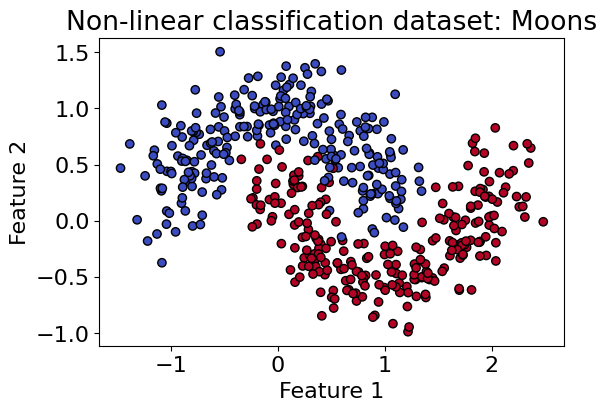

Logistic Regression Accuracy: 0.86
Neural Network Accuracy: 0.99


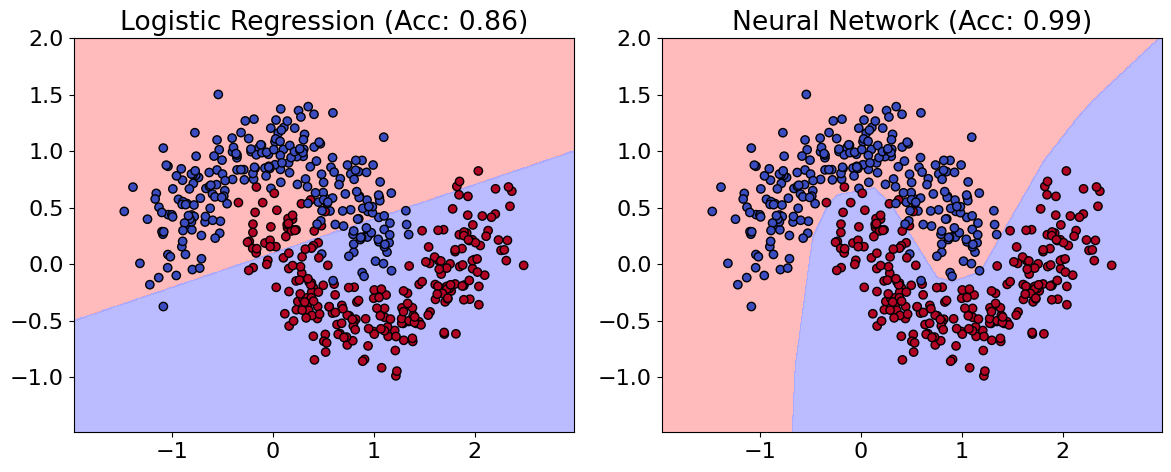

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Step 1: Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Step 2: Visualize the dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Non-linear classification dataset: Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3: Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg_acc = accuracy_score(y, log_reg.predict(X))
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")

# Step 4: Train Neural Network (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
mlp.fit(X, y)
mlp_acc = accuracy_score(y, mlp.predict(X))
print(f"Neural Network Accuracy: {mlp_acc:.2f}")

# Step 5: Decision boundary plotting function
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.01  # Meshgrid resolution
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(log_reg, X, y, axes[0], f"Logistic Regression (Acc: {log_reg_acc:.2f})")
plot_decision_boundary(mlp, X, y, axes[1], f"Neural Network (Acc: {mlp_acc:.2f})")
plt.tight_layout()
plt.show()
